<a href="https://colab.research.google.com/github/TMhdSofyan/ImageProcessing/blob/main/Image_Processing_Update3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import skimage
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

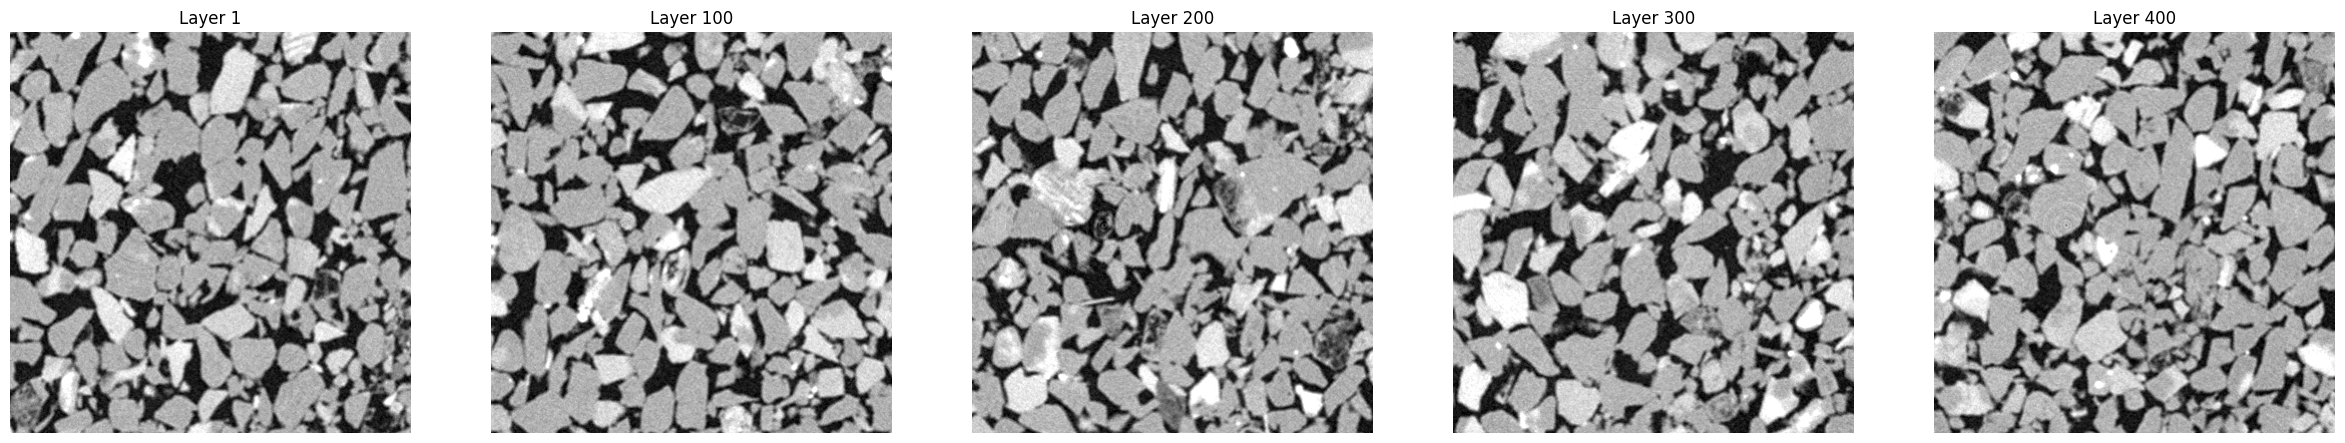

In [4]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store images
images = {}

# List of layer numbers
layers = [1, 100, 200, 300, 400]

# Loop through each layer number to read the image and convert it
for layer in layers:
    file_path = f'/content/drive/MyDrive/00_Image_Processing/Data/Layer_{layer}.png'
    image = io.imread(file_path)
    image_uint8 = np.uint8(image)  # Convert to np.uint8
    images[layer] = image_uint8

# Display images
fig, axes = plt.subplots(1, len(layers), figsize=(30, 30))

for i, (layer, ax) in enumerate(zip(layers, axes)):
    ax.imshow(images[layer], cmap='gray')
    ax.set_title(f'Layer {layer}')
    ax.axis('off')

plt.show()

In [5]:
# Access images using layer numbers
image1 = images[1]
image100 = images[100]
image200 = images[200]
image300 = images[300]
image400 = images[400]

Segmentation

_____________

In [6]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu

<ipython-input-7-98999e347119>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


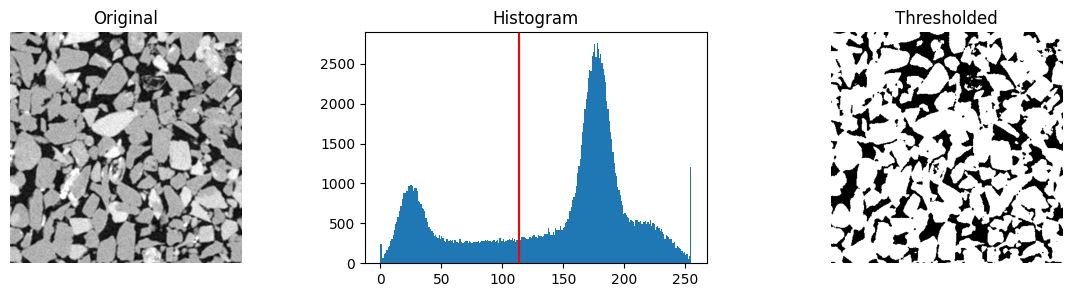

In [7]:
image = image100
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(15, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

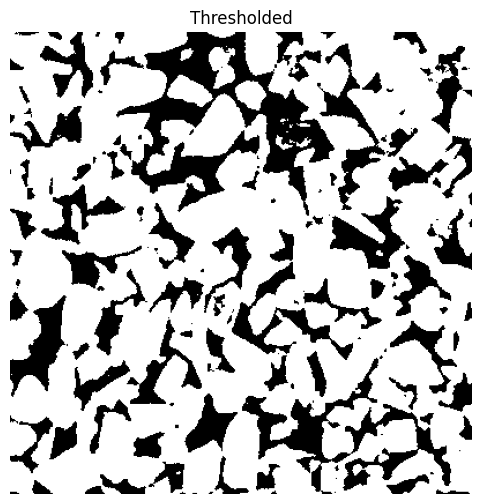

In [8]:
plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap=plt.cm.gray)
plt.title('Thresholded')
plt.axis('off')

plt.show()

In [9]:
from skimage.morphology import reconstruction
help(reconstruction)

Help on function reconstruction in module skimage.morphology.grayreconstruct:

reconstruction(seed, mask, method='dilation', footprint=None, offset=None)
    Perform a morphological reconstruction of an image.
    
    Morphological reconstruction by dilation is similar to basic morphological
    dilation: high-intensity values will replace nearby low-intensity values.
    The basic dilation operator, however, uses a footprint to
    determine how far a value in the input image can spread. In contrast,
    reconstruction uses two images: a "seed" image, which specifies the values
    that spread, and a "mask" image, which gives the maximum allowed value at
    each pixel. The mask image, like the footprint, limits the spread
    of high-intensity values. Reconstruction by erosion is simply the inverse:
    low-intensity values spread from the seed image and are limited by the mask
    image, which represents the minimum allowed value.
    
    Alternatively, you can think of reconstruc

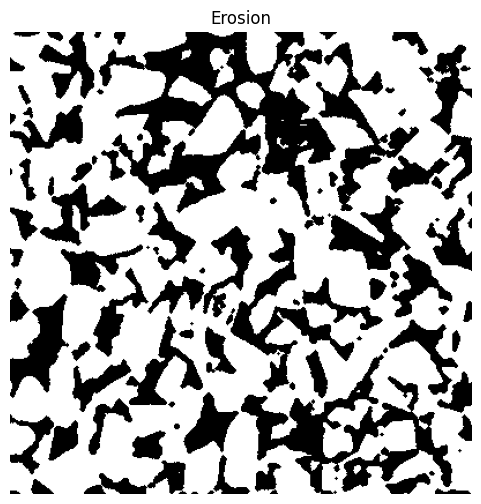

In [10]:
from skimage.morphology import erosion
Erosion = skimage.morphology.erosion(binary, footprint=None, out=None, shift_x=False, shift_y=False)

plt.figure(figsize=(6, 6))
plt.imshow(Erosion, cmap=plt.cm.gray)
plt.title('Erosion')
plt.axis('off')

plt.show()

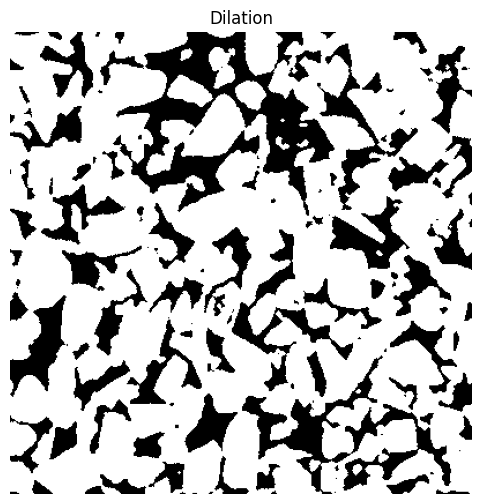

In [11]:
from skimage.morphology import dilation
Dilation = skimage.morphology.dilation(Erosion, footprint=None, out=None, shift_x=False, shift_y=False)

plt.figure(figsize=(6, 6))
plt.imshow(Dilation, cmap=plt.cm.gray)
plt.title('Dilation')
plt.axis('off')

plt.show()

In [12]:
image = image100
thresh = threshold_otsu(image)
binary = image > thresh

# Mengidentifikasi pore dan grain
pore = (binary == 0)
grain = (binary == 1)

# Menghitung jumlah piksel untuk pore dan grain
total_pixels = binary.size
pore_pixels = np.sum(pore)
grain_pixels = np.sum(grain)

# Menghitung jumlah fraction untuk pore dan grain
pore_fraction = pore_pixels / total_pixels
grain_fraction = grain_pixels / total_pixels

print(f"Jumlah fraction untuk pore: {pore_fraction}")
print(f"Jumlah fraction untuk grain: {grain_fraction}")

Jumlah fraction untuk pore: 0.28760625
Jumlah fraction untuk grain: 0.71239375


Region Measurement

In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

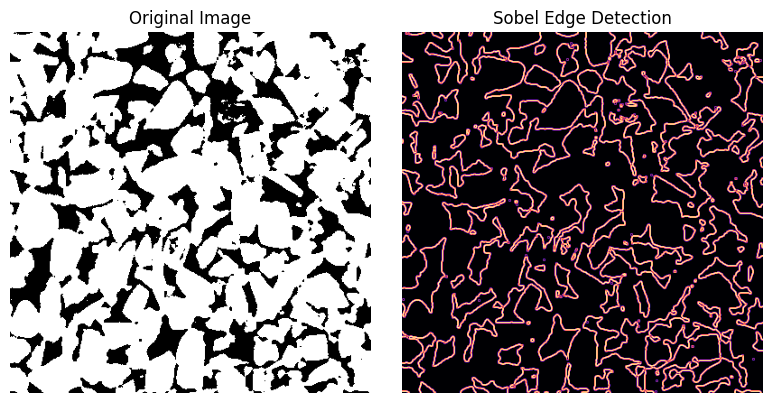

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

# Misalkan 'binary' adalah gambar biner Anda
# binary = ...

# Terapkan deteksi tepi Sobel
edge_sobel = filters.sobel(binary)

# Visualisasi
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

axes[0].imshow(binary, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(edge_sobel, cmap='magma')
axes[1].set_title('Sobel Edge Detection')
axes[1].axis('off')

plt.tight_layout()
plt.show()

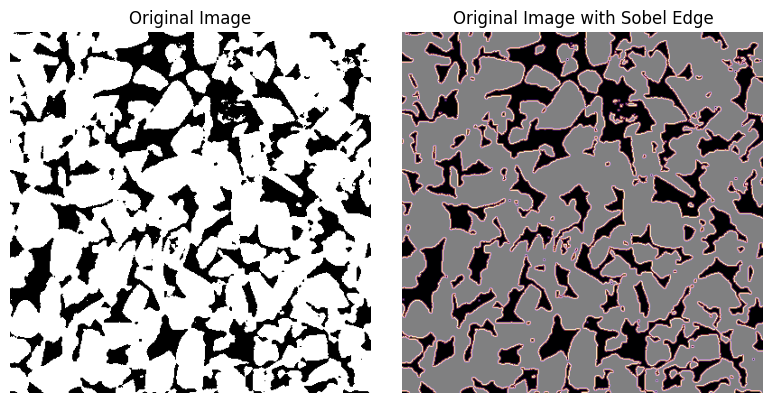

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

# Misalkan 'binary' adalah gambar biner Anda
# binary = ...

# Terapkan deteksi tepi Sobel
edge_sobel = filters.sobel(binary)

# Visualisasi
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

# Tampilkan gambar asli
axes[0].imshow(binary, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Tampilkan gambar deteksi tepi
axes[1].imshow(binary, cmap=plt.cm.gray)
axes[1].imshow(edge_sobel, cmap='magma', alpha=0.5)  # alpha mengontrol transparansi
axes[1].set_title('Original Image with Sobel Edge')
axes[1].axis('off')

plt.tight_layout()
plt.show()

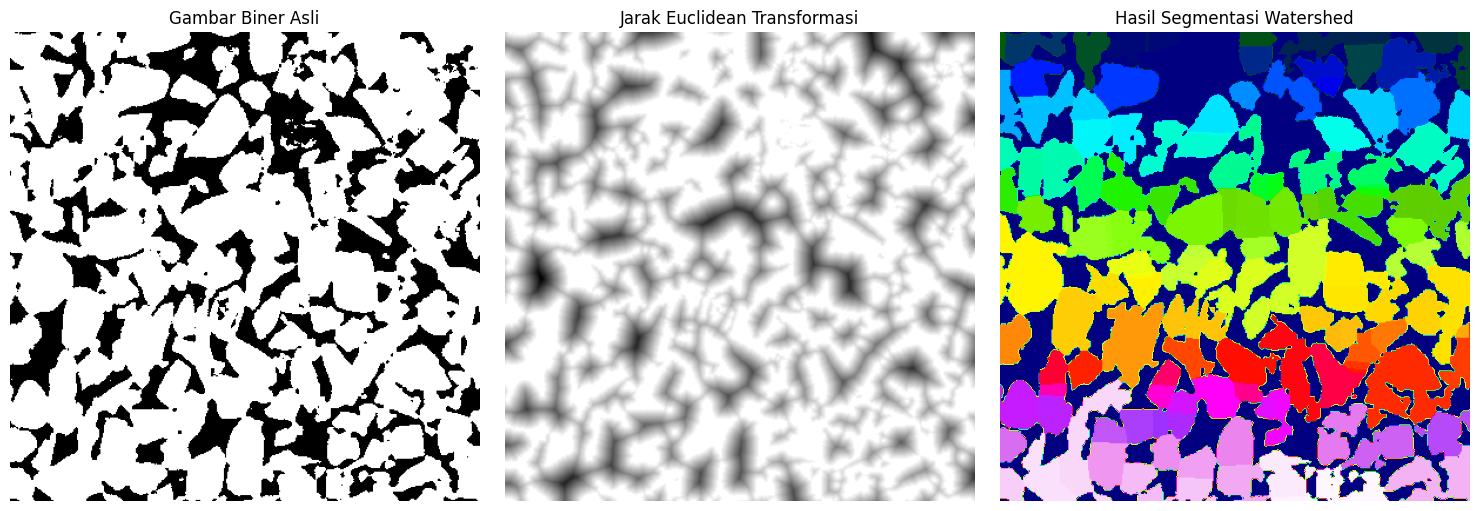

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.morphology import erosion, square

# Pra-pemrosesan dengan erosi
binary_eroded = erosion(binary, square(1))

# EDT dan peak_local_max dengan threshold
distance = ndi.distance_transform_edt(binary_eroded)
coords = peak_local_max(distance, footprint=np.ones((10, 10)), labels=binary_eroded, threshold_abs=10)

# Langkah 3: Label Marker
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)

# Langkah 4: Jalankan Segmentasi Watershed
labels = watershed(-distance, markers, mask=binary)

# Langkah 5: Visualisasi
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(binary, cmap='gray')
axes[0].set_title('Gambar Biner Asli')
axes[0].axis('off')

axes[1].imshow(-distance, cmap='gray')
axes[1].set_title('Jarak Euclidean Transformasi')
axes[1].axis('off')

axes[2].imshow(labels, cmap='gist_ncar')
axes[2].set_title('Hasil Segmentasi Watershed')
axes[2].axis('off')

plt.tight_layout()
plt.show()

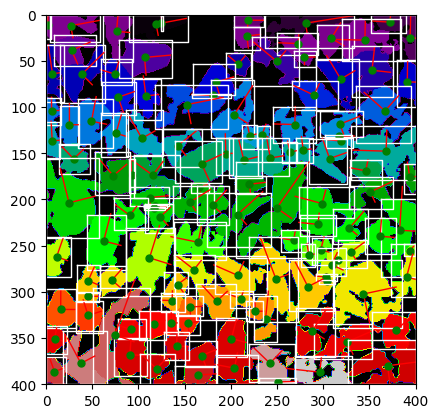

In [17]:

import math
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Misalkan 'labels' adalah array label dari algoritma watershed
label_img = labels  # Gunakan array label ini, bukan gambar biner
regions = regionprops(label_img)  # Ekstrak properti dari setiap region

# Inisialisasi plot
fig, ax = plt.subplots()
ax.imshow(labels, cmap=plt.cm.nipy_spectral)  # Gantikan 'binary' dengan 'labels' dan ubah cmap

# Iterasi melalui setiap region dan plot properti
for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=1)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=1)
    ax.plot(x0, y0, '.g', markersize=10)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-w', linewidth=1)

# Sesuaikan ukuran sumbu sesuai kebutuhan
ax.axis((0, labels.shape[1], labels.shape[0], 0))
plt.show()


In [18]:

props = regionprops_table(label_img, properties=('label',
                                                 'centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length',
                                                 'area',
                                                 'equivalent_diameter_area',
                                                 ))

pd.DataFrame(props)

,label,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length,area,equivalent_diameter_area
0,1,10.239450,119.055963,-1.384267,66.406836,24.543042,1090,37.253605
1,2,9.000000,124.500000,0.000000,19.595918,2.000000,34,6.579525
2,3,9.196429,280.802019,-1.413950,105.810424,22.602213,1288,40.496080
3,4,8.119128,372.211409,1.502115,37.836574,21.244862,596,27.547246
4,5,25.253385,393.930368,-0.025572,56.406586,14.177132,517,25.656673
...,...,...,...,...,...,...,...,...
125,126,346.532833,74.376642,-0.345874,127.017879,44.102801,2132,52.101312
126,127,377.399093,37.743008,0.491541,61.552125,33.694145,1323,41.042611
127,128,377.280629,242.267384,0.807071,47.224939,38.285922,1208,39.218279
128,129,397.468966,250.772414,-1.539397,43.155367,5.332832,145,13.587484


__________________

**2D To 3D**

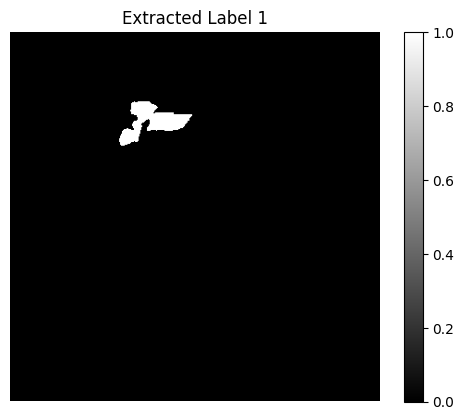

In [37]:
import matplotlib.pyplot as plt

# Ensure that 'labels' contains the labeled image
label_to_extract = 30

# Extracting the array of the specified label
extracted_label_array = (labels == label_to_extract).astype(int)

# Visualizing the extracted label array
plt.imshow(extracted_label_array, cmap='gray')
plt.title('Extracted Label 1')
plt.axis('off')
plt.colorbar()
plt.show()


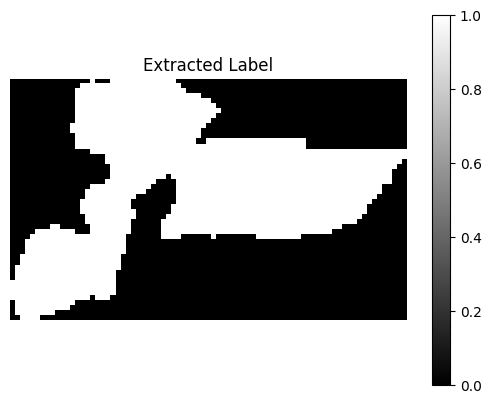

In [39]:
def extract_label(labels, label_to_extract):
    """
    Extract a specific label from the labeled image and return it in its bounding box.
    """
    import numpy as np

    regions = regionprops(labels)  # Get the properties of each labeled region

    for region in regions:
        if region.label == label_to_extract:
            minr, minc, maxr, maxc = region.bbox  # Get the bounding box coordinates
            extracted_label = labels[minr:maxr, minc:maxc]  # Extract the region within the bounding box
            extracted_label = (extracted_label == label_to_extract).astype(int)  # Keep only the specific label

            return extracted_label  # Return the extracted label in its bounding box

# Usage example
label_to_extract = 30  # specify the label you want to extract
extracted_label_array = extract_label(labels, label_to_extract)

# Now, you can visualize or analyze the 'extracted_label_array'
plt.imshow(extracted_label_array, cmap='gray')
plt.title('Extracted Label')
plt.axis('off')
plt.colorbar()
plt.show()

In [48]:
import numpy as np

# Set print options
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# Now, you can print the array
print(extracted_label_array)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 

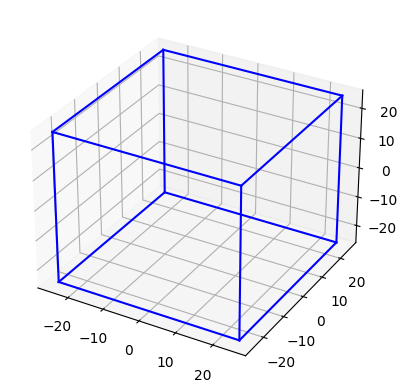

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from itertools import product, combinations

# Assuming major_length contains the length of the major axis of label 30
major_length = 50  # Example value, replace with the actual value

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Drawing the cube
r = [-major_length/2, major_length/2]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

plt.show()

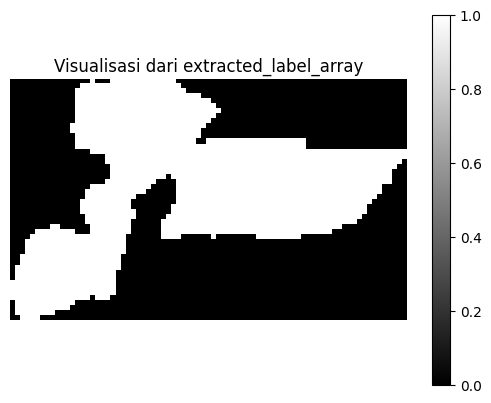

In [51]:
import matplotlib.pyplot as plt

# Menampilkan gambar dari array
plt.imshow(extracted_label_array, cmap='gray')  # menggunakan colormap gray untuk gambar biner
plt.title('Visualisasi dari extracted_label_array')
plt.axis('off')  # menyembunyikan sumbu koordinat
plt.colorbar()  # menampilkan colorbar untuk referensi intensitas piksel
plt.show()

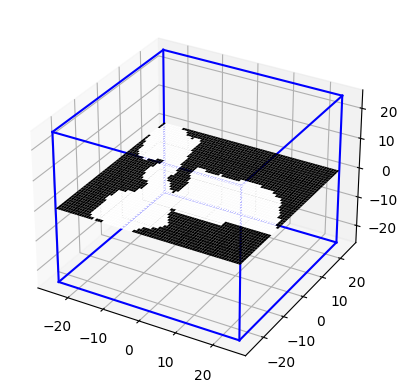

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming extracted_label_array is your array and major_length is the size of the cube
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Drawing the cube
r = [-major_length/2, major_length/2]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

# Displaying the 2D image at z=0
x, y = np.meshgrid(np.linspace(-major_length/2, major_length/2, extracted_label_array.shape[1]),
                   np.linspace(-major_length/2, major_length/2, extracted_label_array.shape[0]))
z = np.zeros_like(x)
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(extracted_label_array/np.max(extracted_label_array)),
                linewidth=0, antialiased=True, shade=False)

plt.show()


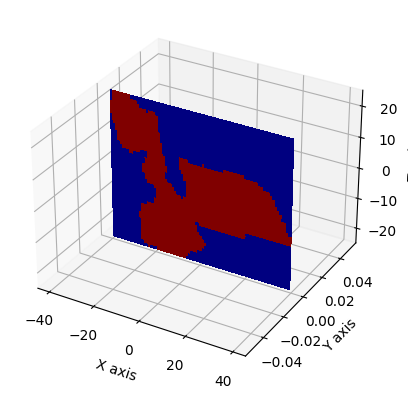

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming `extracted_label_array` is your 2D image array.
# Let's create the (x, 0, z) coordinates for the 3D transformation.

# Get the original dimensions of the image
height, width = extracted_label_array.shape

# Create the x coordinates based on the width of the image
x = np.linspace(-width/2, width/2, width)

# Create the z coordinates based on the height of the image or pixel values
# If the height represents the 'thickness' in the z direction.
z = np.linspace(-height/2, height/2, height)

# Create the y coordinates, which will be zeros since we want y = 0
y = np.zeros((height, width))

# Now, we'll create a 3D meshgrid to map the 2D image onto the (x, 0, z) plane.
X, Z = np.meshgrid(x, z)
Y = np.zeros_like(X)

# Visualize the transformation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Use the pixel values of the 2D image as height for the 3D transformation
# If the pixel values are not suitable for heights directly, you may need to scale them.
# Here, we're just using the z index as the height for simplicity.
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=plt.cm.jet(extracted_label_array/np.max(extracted_label_array)),
                linewidth=0, antialiased=False, shade=False)

# Set labels for axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()


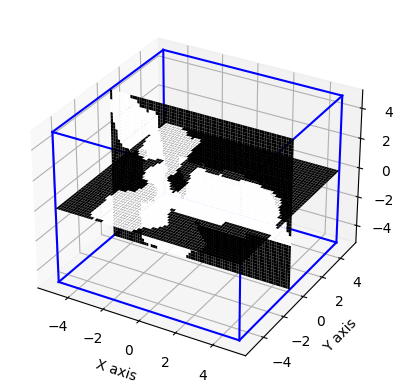

In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from itertools import product, combinations

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the major_length (adjust this according to your needs)
major_length = 10

# Drawing the cube
r = [-major_length/2, major_length/2]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

# Displaying the 2D image at z=0 for the first image (x, y, 0)
x, y = np.meshgrid(np.linspace(-major_length/2, major_length/2, extracted_label_array.shape[1]),
                   np.linspace(-major_length/2, major_length/2, extracted_label_array.shape[0]))
z = np.zeros_like(x)
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(extracted_label_array/np.max(extracted_label_array)),
                linewidth=0, antialiased=True, shade=False)

# Displaying the 2D image at z=0 for the second image (x, 0, z)
x, z = np.meshgrid(np.linspace(-major_length/2, major_length/2, extracted_label_array.shape[1]),
                   np.linspace(-major_length/2, major_length/2, extracted_label_array.shape[0]))
y = np.zeros_like(x)
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(extracted_label_array/np.max(extracted_label_array)),
                linewidth=0, antialiased=True, shade=False)

# Set labels for axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()
